In [2]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split

## Import Data

In [3]:
carData = pd.read_csv('SG_usedcar.csv')
carData.head()

,Brand,Type,Reg_date,Coe_left,Dep,Mileage,Road Tax,Dereg Value,COE,Engine Cap,Curb Weight,Manufactured,Transmission,OMV,ARF,Power,No. of Owners,Price,Unnamed: 18
0,BMW 5 Series 520i Highline,Luxury Sedan,28-May-13,1yr 11mths 21days COE left),15920,N.A,1210,38133,67304,1997,1610,2013,Auto,41566,45193,135,1,54000,NaN
1,Honda Vezel 1.5A X Honda Sensing,SUV,14-Oct-15,4yrs 4mths 7days COE left),10310,50000,682,31237,56001,1496,1190,2015,Auto,19775,9775,96,2,49800,NaN
2,MINI One 1.6A (New 10-yr COE),Hatchback,7-Oct-11,10yrs COE left),6280,110000,742,N.A,N.A,1598,1100,2011,Auto,18180,18180,72,3,62800,NaN
3,Hyundai Avante 1.6A (COE till 02/2029),Mid-Sized Sedan,12-Feb-09,7yrs 8mths 5days COE left),N.A,N.A,959,N.A,25727,1591,1264,2009,Auto,10763,10763,89,3,N.A,NaN
4,Suzuki Swift Sport 1.6M (COE till 12/2022),Hatchback,28-Dec-07,1yr 6mths 21days COE left),8210,203000,1030,6656,21349,1586,1060,2007,Manual,12154,13370,92,2,12800,NaN


In [4]:
carData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4411 entries, 0 to 4410
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Brand          4411 non-null   object 
 1   Type           4411 non-null   object 
 2   Reg_date       4411 non-null   object 
 3   Coe_left       4389 non-null   object 
 4   Dep            4411 non-null   object 
 5   Mileage        4411 non-null   object 
 6   Road Tax       4411 non-null   object 
 7   Dereg Value    4411 non-null   object 
 8   COE            4411 non-null   object 
 9   Engine Cap     4411 non-null   object 
 10  Curb Weight    4411 non-null   object 
 11  Manufactured   4411 non-null   object 
 12  Transmission   4411 non-null   object 
 13  OMV            4411 non-null   object 
 14  ARF            4411 non-null   object 
 15  Power          4411 non-null   object 
 16  No. of Owners  4411 non-null   object 
 17  Price          4411 non-null   object 
 18  Unnamed:

## Change N.A to nan

In [5]:
carData = carData.replace('N.A',np.nan)
carData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4411 entries, 0 to 4410
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Brand          4411 non-null   object 
 1   Type           4411 non-null   object 
 2   Reg_date       4411 non-null   object 
 3   Coe_left       4389 non-null   object 
 4   Dep            3703 non-null   object 
 5   Mileage        2851 non-null   object 
 6   Road Tax       3983 non-null   object 
 7   Dereg Value    3446 non-null   object 
 8   COE            4152 non-null   object 
 9   Engine Cap     4408 non-null   object 
 10  Curb Weight    4331 non-null   object 
 11  Manufactured   4391 non-null   object 
 12  Transmission   4411 non-null   object 
 13  OMV            3993 non-null   object 
 14  ARF            4398 non-null   object 
 15  Power          4388 non-null   object 
 16  No. of Owners  4339 non-null   object 
 17  Price          3676 non-null   object 
 18  Unnamed:

## Removing missing values

In [6]:
carData.dropna(subset=['Price'], inplace=True)
carData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3676 entries, 0 to 4410
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Brand          3676 non-null   object 
 1   Type           3676 non-null   object 
 2   Reg_date       3676 non-null   object 
 3   Coe_left       3670 non-null   object 
 4   Dep            3676 non-null   object 
 5   Mileage        2830 non-null   object 
 6   Road Tax       3280 non-null   object 
 7   Dereg Value    3434 non-null   object 
 8   COE            3446 non-null   object 
 9   Engine Cap     3673 non-null   object 
 10  Curb Weight    3616 non-null   object 
 11  Manufactured   3671 non-null   object 
 12  Transmission   3676 non-null   object 
 13  OMV            3288 non-null   object 
 14  ARF            3673 non-null   object 
 15  Power          3669 non-null   object 
 16  No. of Owners  3627 non-null   object 
 17  Price          3676 non-null   object 
 18  Unnamed: 18  

In [7]:
carData.fillna(0, inplace=True)
carData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3676 entries, 0 to 4410
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Brand          3676 non-null   object 
 1   Type           3676 non-null   object 
 2   Reg_date       3676 non-null   object 
 3   Coe_left       3676 non-null   object 
 4   Dep            3676 non-null   object 
 5   Mileage        3676 non-null   object 
 6   Road Tax       3676 non-null   object 
 7   Dereg Value    3676 non-null   object 
 8   COE            3676 non-null   object 
 9   Engine Cap     3676 non-null   object 
 10  Curb Weight    3676 non-null   object 
 11  Manufactured   3676 non-null   object 
 12  Transmission   3676 non-null   object 
 13  OMV            3676 non-null   object 
 14  ARF            3676 non-null   object 
 15  Power          3676 non-null   object 
 16  No. of Owners  3676 non-null   object 
 17  Price          3676 non-null   object 
 18  Unnamed: 18  

In [8]:
convert_dict = {'Mileage': 'int64','Road Tax': 'int64','COE': 'int64','OMV': 'int64','ARF': 'int64', 'Manufactured': 'int64','No. of Owners': 'int64','Price': 'int64','Dereg Value':'int64','Engine Cap':'int64','Curb Weight':'int64','Power':'int64','Type':'category'}

In [9]:
carData = carData.astype(convert_dict)
carData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3676 entries, 0 to 4410
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Brand          3676 non-null   object  
 1   Type           3676 non-null   category
 2   Reg_date       3676 non-null   object  
 3   Coe_left       3676 non-null   object  
 4   Dep            3676 non-null   object  
 5   Mileage        3676 non-null   int64   
 6   Road Tax       3676 non-null   int64   
 7   Dereg Value    3676 non-null   int64   
 8   COE            3676 non-null   int64   
 9   Engine Cap     3676 non-null   int64   
 10  Curb Weight    3676 non-null   int64   
 11  Manufactured   3676 non-null   int64   
 12  Transmission   3676 non-null   object  
 13  OMV            3676 non-null   int64   
 14  ARF            3676 non-null   int64   
 15  Power          3676 non-null   int64   
 16  No. of Owners  3676 non-null   int64   
 17  Price          3676 non-null   int64  

In [10]:
df2 = carData[['Engine Cap', 'Curb Weight', 'Manufactured', 'OMV', 'ARF', 'Power', 'No. of Owners','Price']]
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3676 entries, 0 to 4410
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Engine Cap     3676 non-null   int64
 1   Curb Weight    3676 non-null   int64
 2   Manufactured   3676 non-null   int64
 3   OMV            3676 non-null   int64
 4   ARF            3676 non-null   int64
 5   Power          3676 non-null   int64
 6   No. of Owners  3676 non-null   int64
 7   Price          3676 non-null   int64
dtypes: int64(8)
memory usage: 258.5 KB


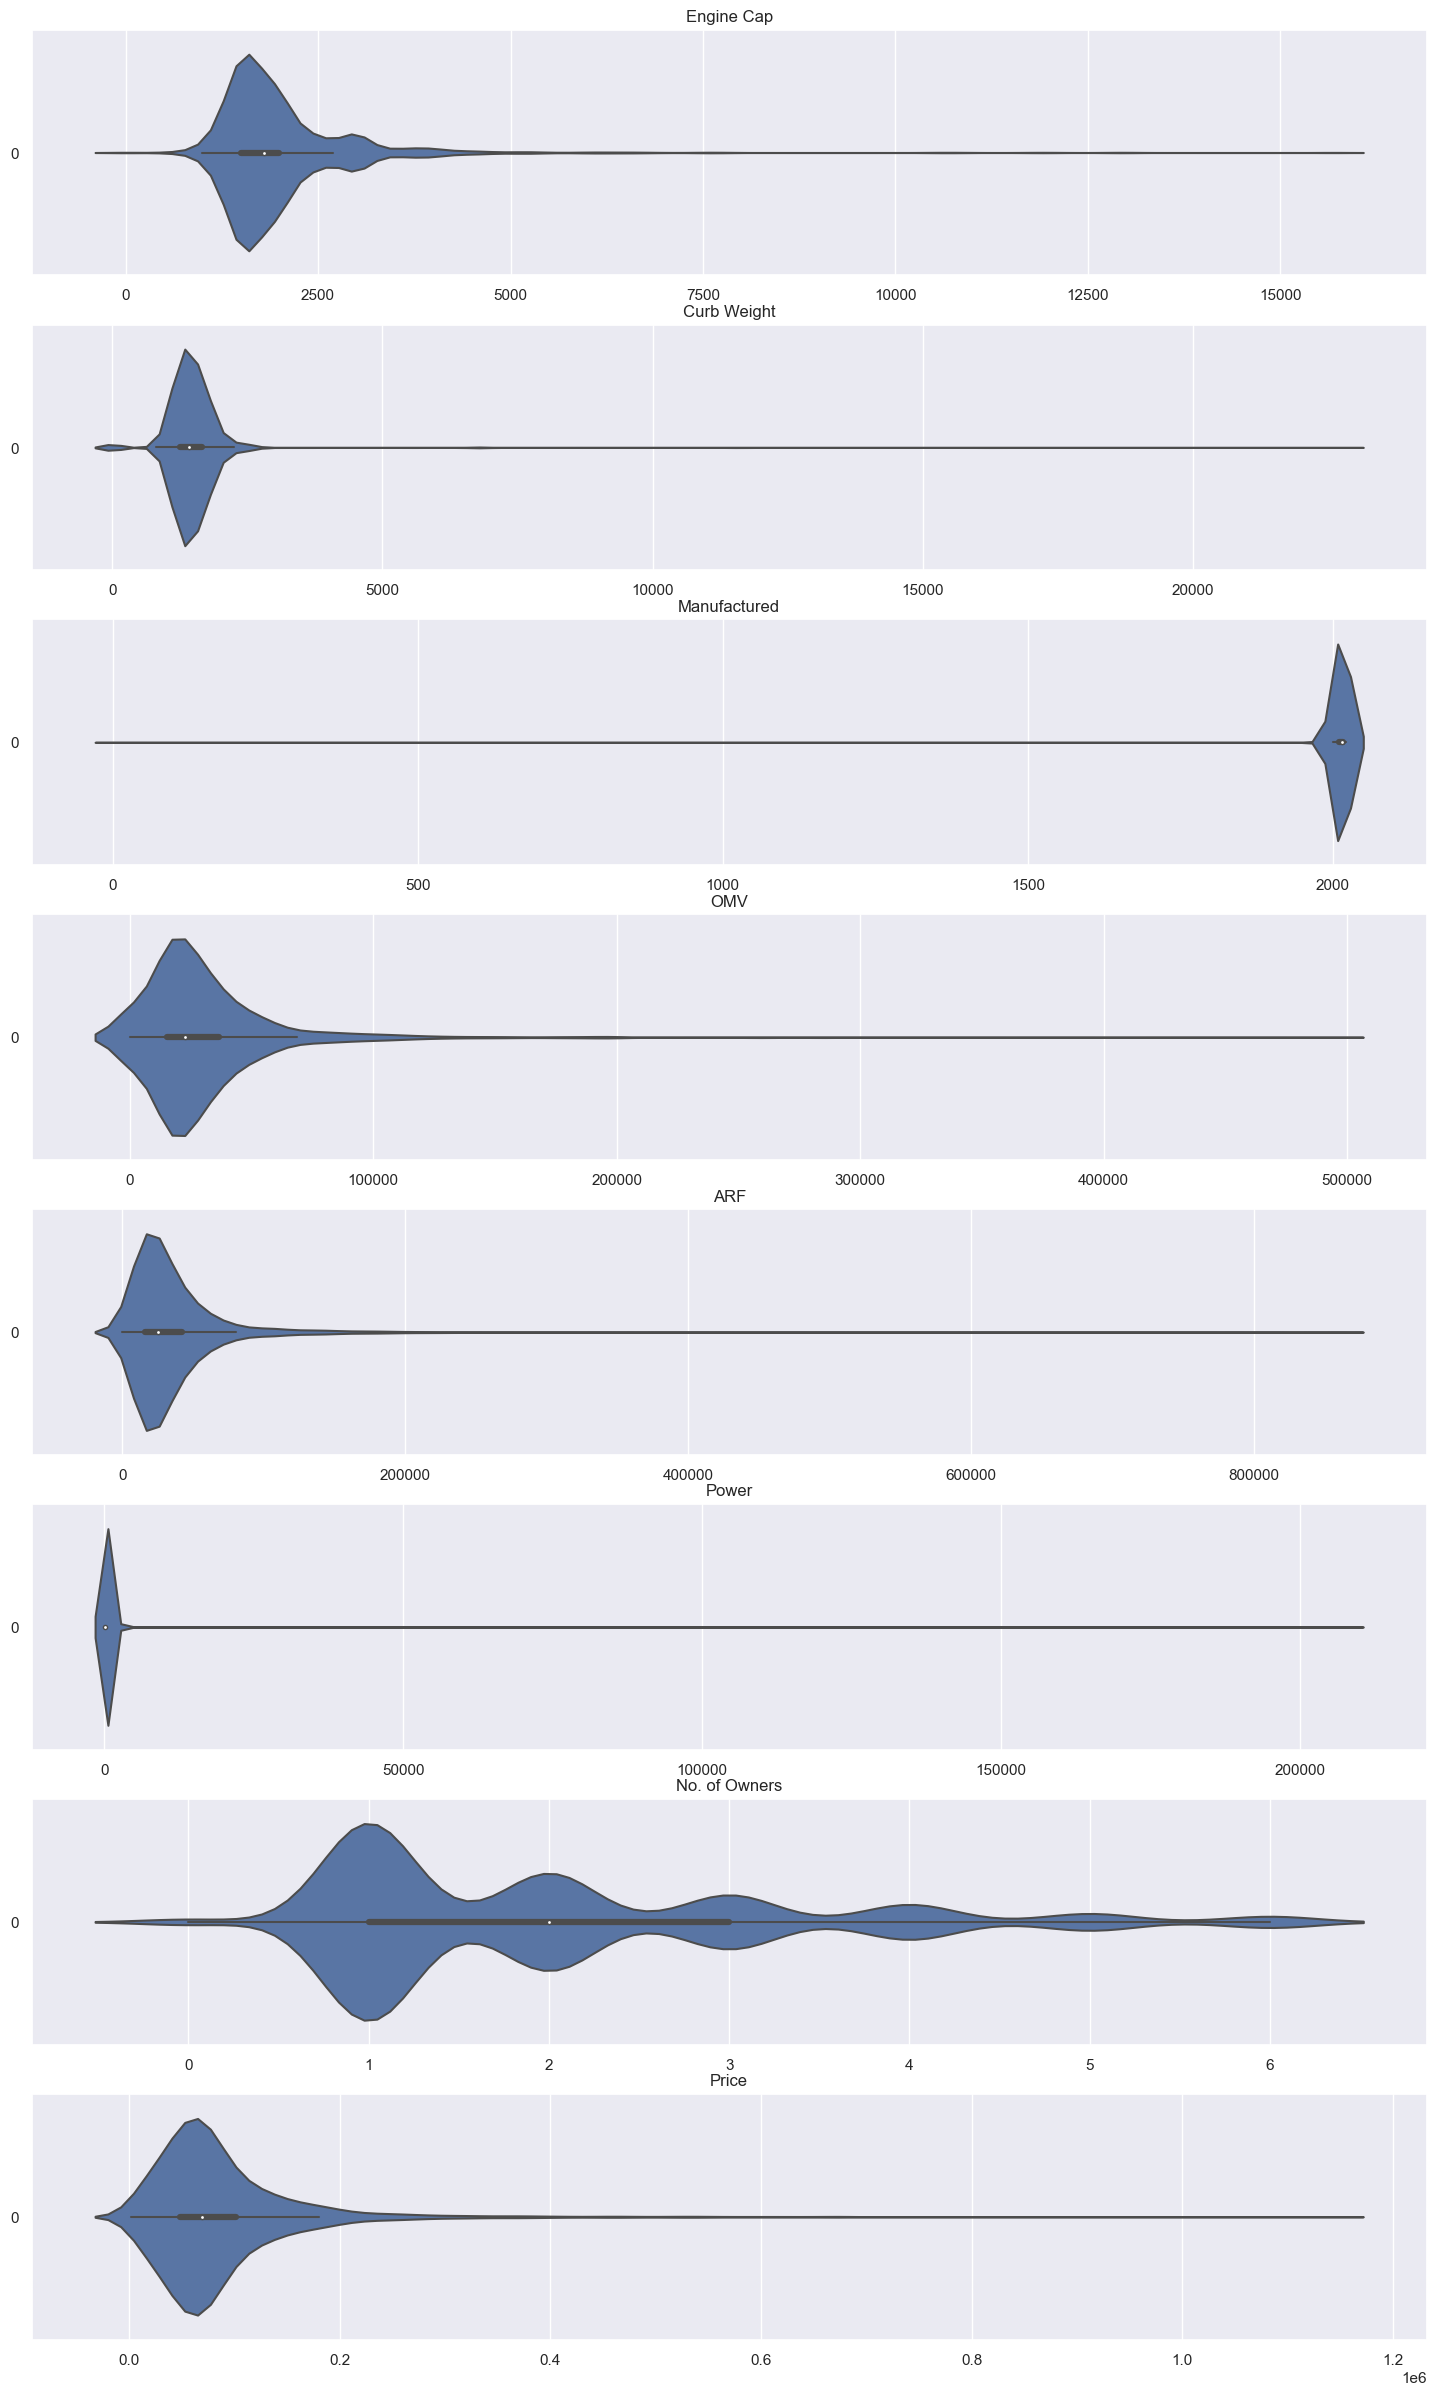

In [11]:
f, axes = plt.subplots(8, 1, figsize=(18, 30))

count = 0
for var in df2:
    sb.violinplot(data = df2[var], orient = "h", ax = axes[count], title= var)
    axes[count].set_title(var)
    count += 1

There seems to have quite a extreme outliers for a few varaibles.

In [12]:
test_size = 0.2
train_test_dict = {}

for var in df2:
    # Split the variable into train and test sets
    train_data, test_data = train_test_split(df2[var], test_size=test_size, random_state=42)
    
    # Store the train and test sets in a dictionary
    train_test_dict[var + '_train'] = train_data
    train_test_dict[var + '_test'] = test_data

In [13]:
X_train = train_test_dict['Engine Cap_train'].values.reshape(-1, 1)  # Reshape to a single feature
y_train = train_test_dict['Price_train']

# Initialize and fit the Linear Regression model
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

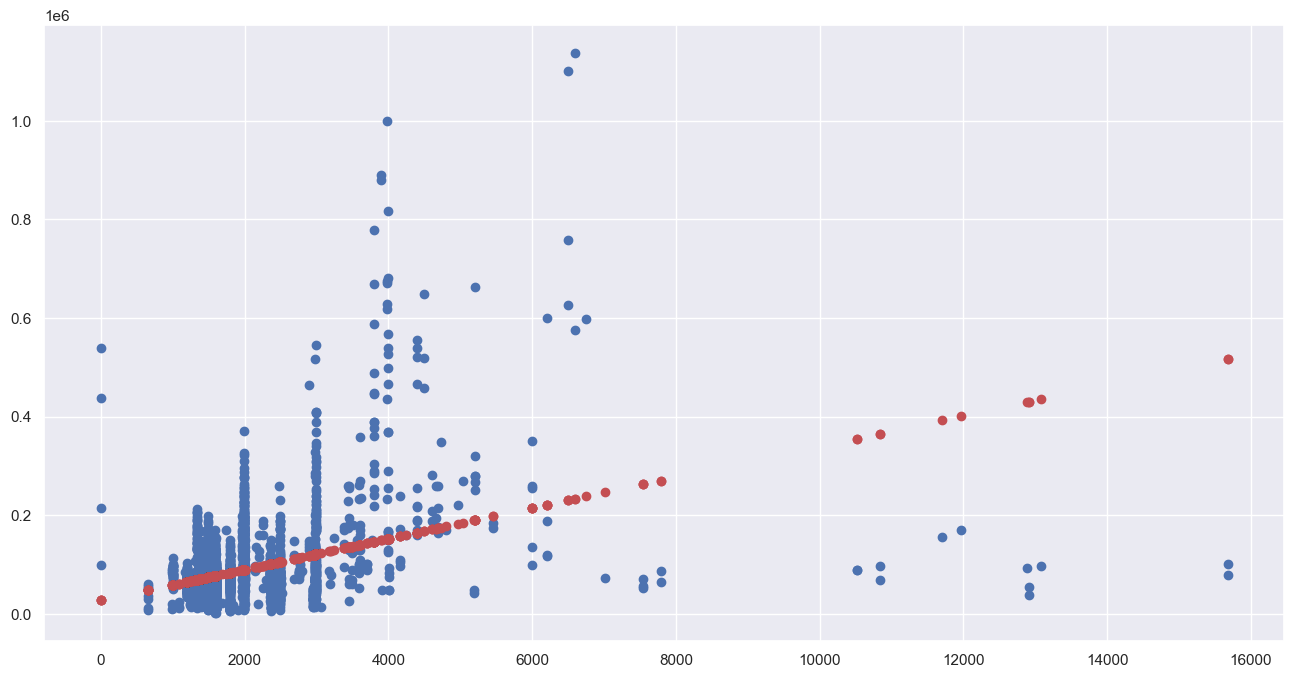

In [14]:
Engine_train_pred = linreg.predict(X_train)

# Plot the Linear Regression line
f = plt.figure(figsize=(16, 8))
plt.scatter(X_train, y_train)
plt.scatter(X_train, Engine_train_pred, color = "r")
plt.show()

In [16]:
#your code here
print("Goodness Of Fit:")
# Explained Variance (R^2)
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))

# Mean Squared Error (MSE)
def mean_sq_err(actual, predicted):
    '''Returns the Mean Squared Error of actual and predicted values'''
    return np.mean(np.square(np.array(actual) - np.array(predicted)))


mse = mean_sq_err(y_train, Engine_train_pred)
print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))

Goodness Of Fit:
Explained Variance (R^2) 	: 0.1372302202407466
Mean Squared Error (MSE) 	: 6585719312.100369
Root Mean Squared Error (RMSE) 	: 81152.44489293202


In [15]:
X1_train = train_test_dict['No. of Owners_train'].values.reshape(-1, 1)  # Reshape to a single feature

# Initialize and fit the Linear Regression model
linreg2 = LinearRegression()
linreg2.fit(X1_train, y_train)

LinearRegression()

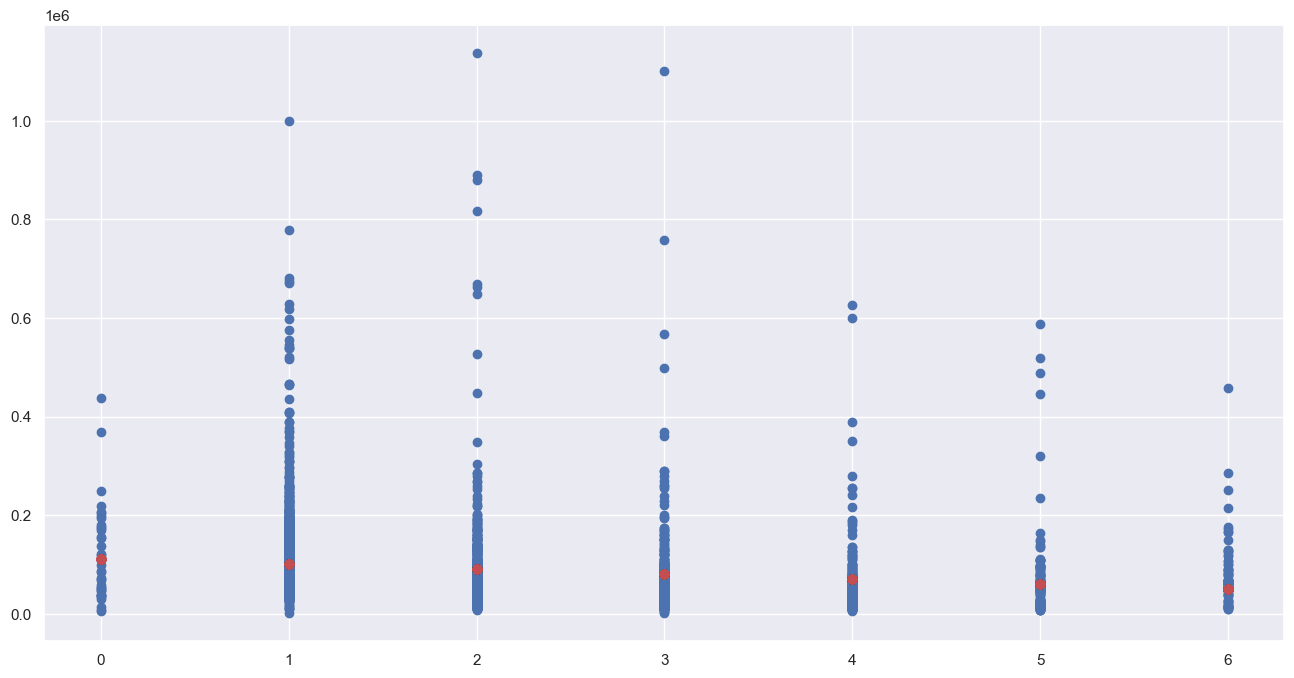

In [18]:
Owners_train_pred = linreg2.predict(X1_train)

# Plot the Linear Regression line
f = plt.figure(figsize=(16, 8))
plt.scatter(X1_train, y_train)
plt.scatter(X1_train, Owners_train_pred, color = "r")
plt.show()

<Axes: xlabel='No. of Owners', ylabel='Price'>

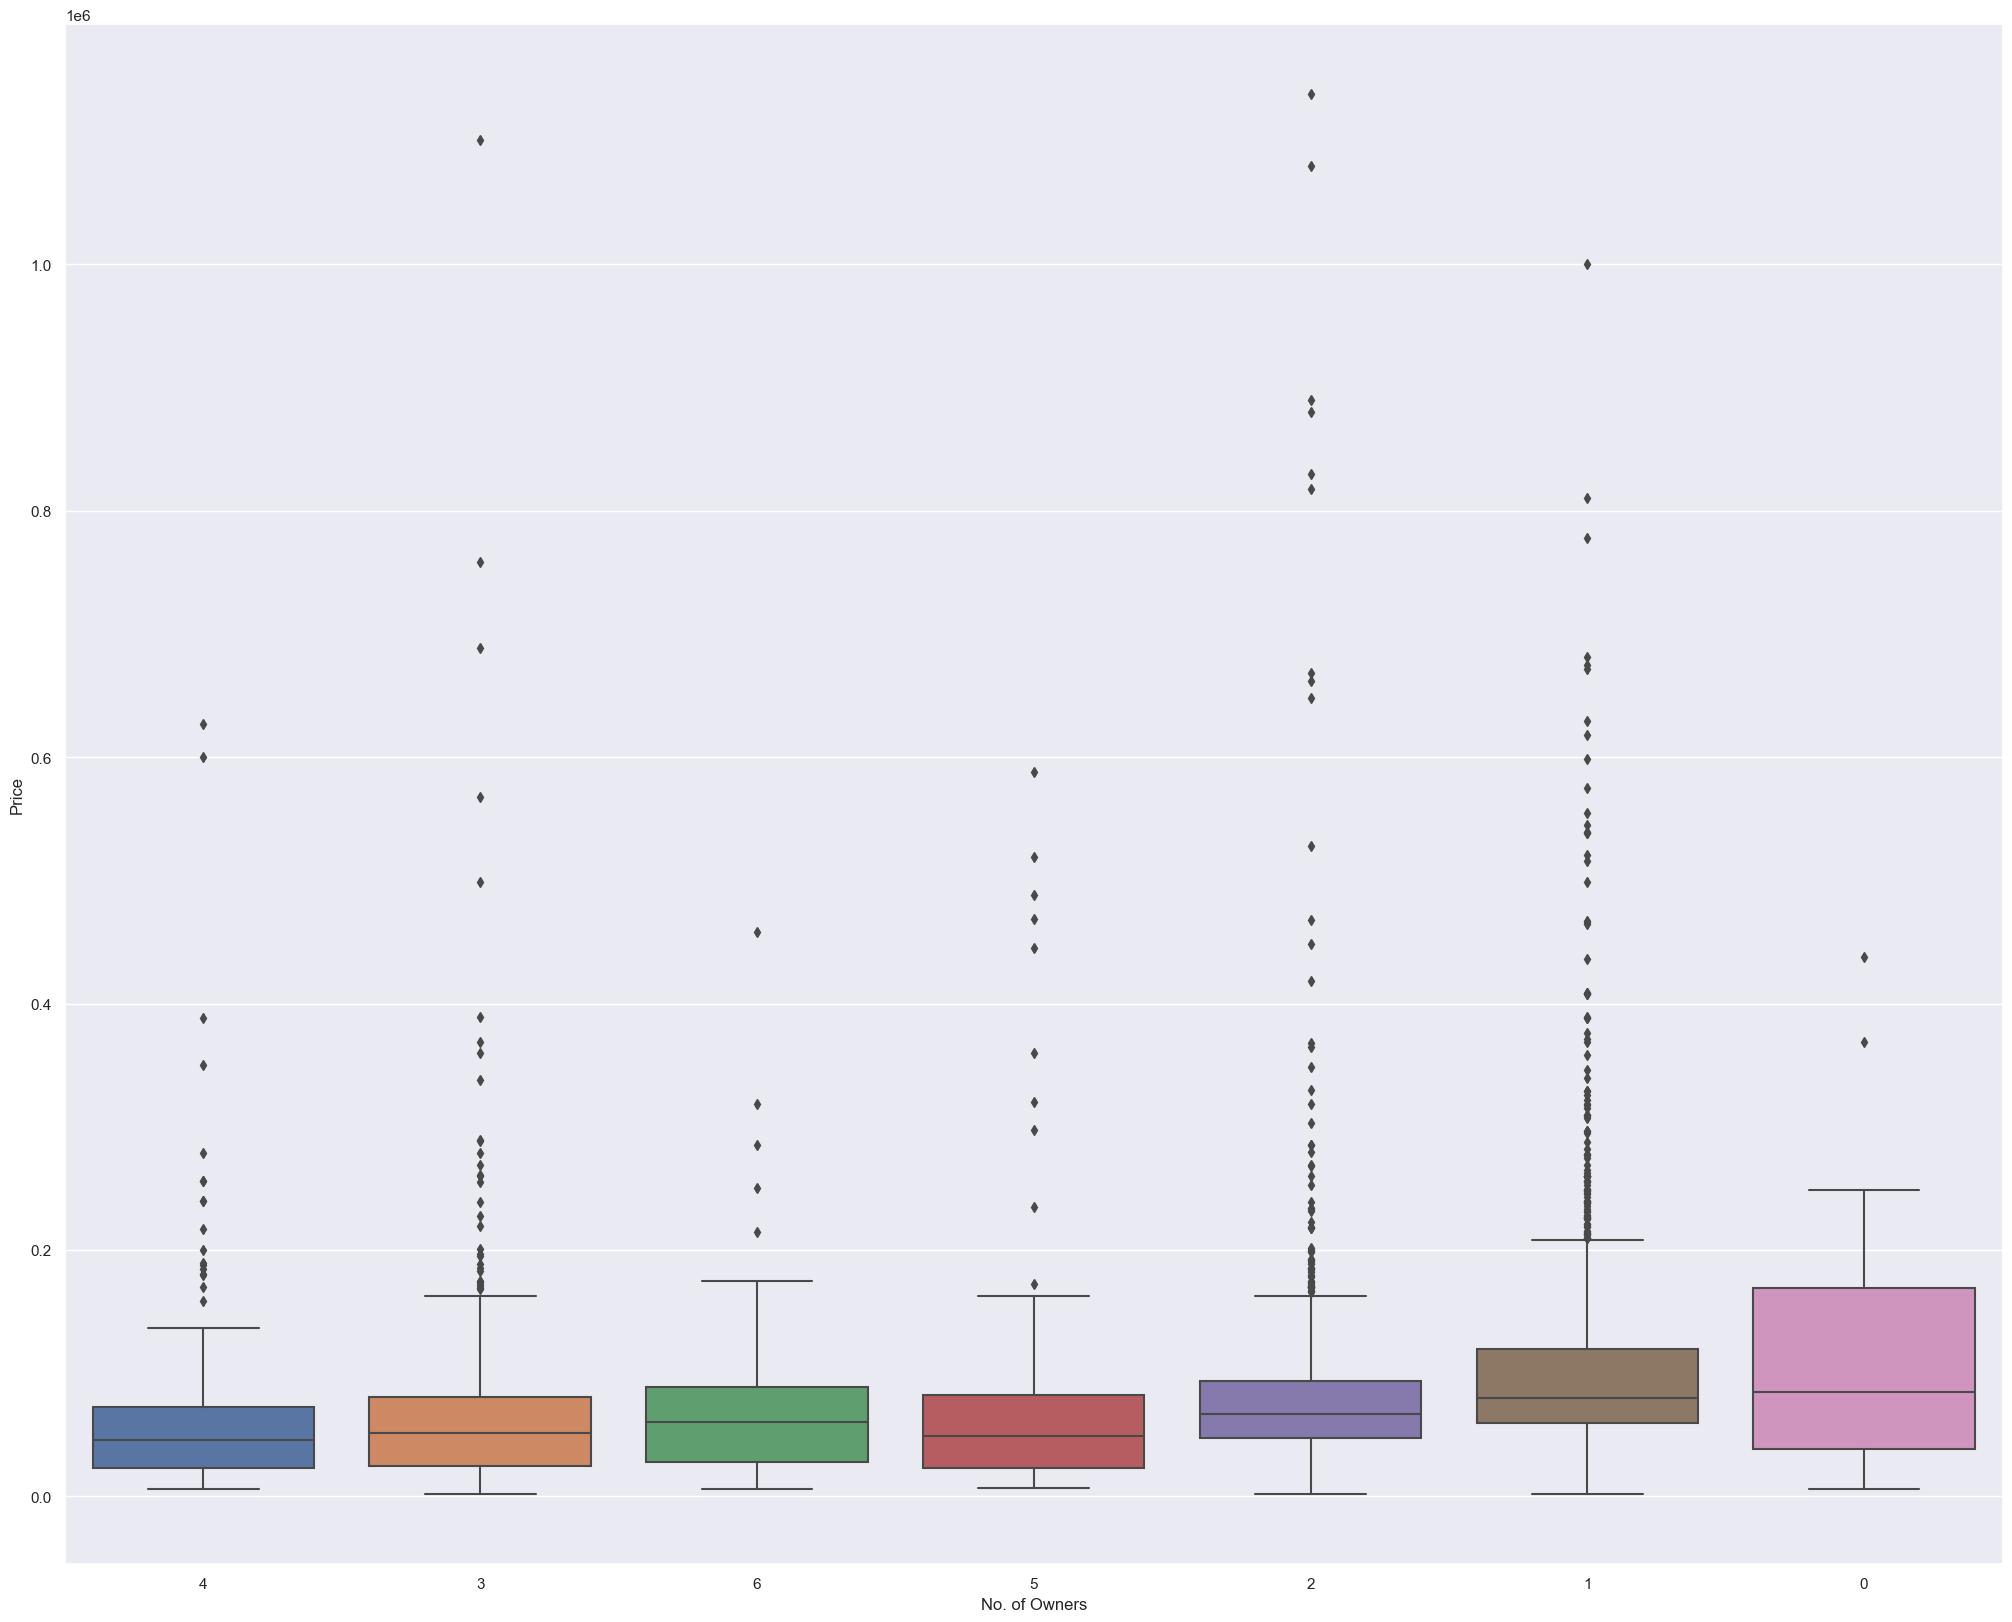

In [19]:
meanOwner = df2.groupby(['No. of Owners'])['Price'].mean().sort_values(ascending=True)

f = plt.figure(figsize=(25, 20))
sb.boxplot(data=df2, x = "No. of Owners", y = "Price", order=meanOwner.index )

In [20]:
#your code here
print("Goodness Of Fit:")
# Explained Variance (R^2)
print("Explained Variance (R^2) \t:", linreg.score(X1_train, y_train))

# Mean Squared Error (MSE)
def mean_sq_err(actual, predicted):
    '''Returns the Mean Squared Error of actual and predicted values'''
    return np.mean(np.square(np.array(actual) - np.array(predicted)))


mse = mean_sq_err(y_train, Owners_train_pred)
print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))

Goodness Of Fit:
Explained Variance (R^2) 	: -0.5180500255654477
Mean Squared Error (MSE) 	: 7445351899.137946
Root Mean Squared Error (RMSE) 	: 86286.45258172309
